In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from subprocess import check_output

print (check_output(["ls", "./input/"]).decode("utf-8"))

Arabic-Original.csv
Arabic-Original.csv.zip
Bangla.csv.zip
English.csv
en.yusufali.csv



In [5]:
df = pd.read_csv('./input/en.yusufali.csv', dtype=object)

In [7]:
df.head(10)

,Surah,Ayah,Text
0,1,1,"In the name of Allah, Most Gracious, Most Merc..."
1,1,2,"Praise be to Allah, the Cherisher and Sustaine..."
2,1,3,"Most Gracious, Most Merciful;"
3,1,4,Master of the Day of Judgment.
4,1,5,"Thee do we worship, and Thine aid we seek."
5,1,6,"Show us the straight way,"
6,1,7,The way of those on whom Thou hast bestowed Th...
7,2,1,A. L. M.
8,2,2,"This is the Book; in it is guidance sure, with..."
9,2,3,"Who believe in the Unseen, are steadfast in pr..."


In [8]:
df.tail(10)

,Surah,Ayah,Text
6226,113,2,From the mischief of created things;
6227,113,3,From the mischief of Darkness as it overspreads;
6228,113,4,From the mischief of those who practise secret...
6229,113,5,And from the mischief of the envious one as he...
6230,114,1,Say: I seek refuge with the Lord and Cherisher...
6231,114,2,"The King (or Ruler) of Mankind,"
6232,114,3,"The god (or judge) of Mankind,-"
6233,114,4,"From the mischief of the Whisperer (of Evil), ..."
6234,114,5,(The same) who whispers into the hearts of Man...
6235,114,6,Among Jinns and among men.


In [9]:
df.describe()

,Surah,Ayah,Text
count,6236,6236,6236
unique,114,286,6154
top,2,2,Then which of the favours of your Lord will ye...
freq,286,114,23


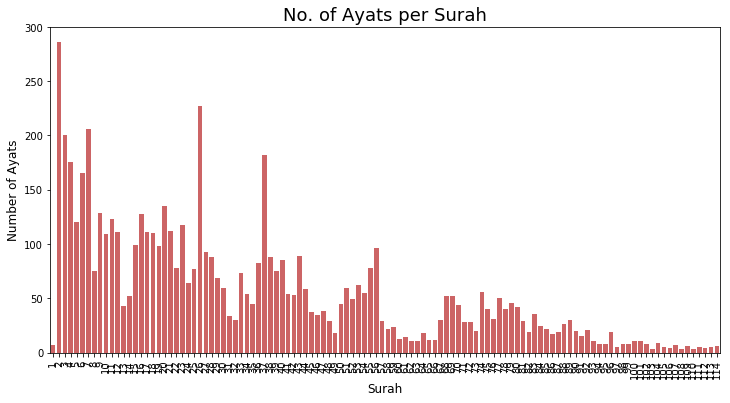

In [14]:
cnt_srs = df['Surah'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Surah', fontsize=12)
plt.ylabel('Number of Ayats', fontsize=12)
plt.title('No. of Ayats per Surah', fontsize=18)
plt.show()

In [15]:
for col in ['Surah', 'Ayah']:
    df[col] = pd.to_numeric(df[col])

def idx(i, j):
    df['index'] = df.index
    return int(df.loc[(df['Surah']==i) & (df['Ayah']==j), 'index'])

cut_points = [-1, idx(2,141), idx(2,252), idx(3,92), idx(4,23), idx(4,147), idx(5,81), idx(6,110), idx(7,87), idx(8,40),
             idx(9,92), idx(11,5), idx(12,52), idx(14,52), idx(16,128), idx(18,74), idx(20,135), idx(22,78), idx(25,20),
             idx(27,55), idx(29,45), idx(33,30), idx(36,27), idx(39,31), idx(41,46), idx(45,37), idx(51,30), idx(57,29),
             idx(66,12), idx(77,50), idx(114,6)]
label_names = [str(i) for i in range(1, len(cut_points))]

if 'Para' not in df.columns:
    df.insert(2, 'Para', pd.cut(df.index,cut_points,labels=label_names))
df.drop('index', axis=1, inplace=True)
df['Para'] = pd.to_numeric(df['Para'])
df.tail(9)

,Surah,Ayah,Para,Text
6227,113,3,30,From the mischief of Darkness as it overspreads;
6228,113,4,30,From the mischief of those who practise secret...
6229,113,5,30,And from the mischief of the envious one as he...
6230,114,1,30,Say: I seek refuge with the Lord and Cherisher...
6231,114,2,30,"The King (or Ruler) of Mankind,"
6232,114,3,30,"The god (or judge) of Mankind,-"
6233,114,4,30,"From the mischief of the Whisperer (of Evil), ..."
6234,114,5,30,(The same) who whispers into the hearts of Man...
6235,114,6,30,Among Jinns and among men.


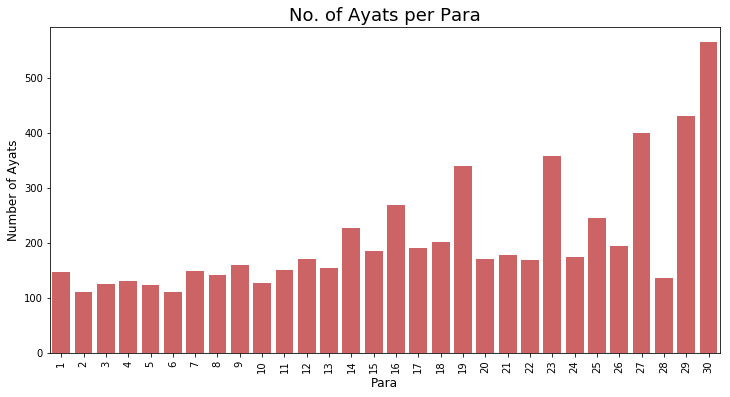

In [16]:
cnt_srs = df['Para'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Para', fontsize=12)
plt.ylabel('Number of Ayats', fontsize=12)
plt.title('No. of Ayats per Para', fontsize=18)
plt.show()